In [156]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [157]:
diab_maindf = pd.read_csv("diabetic_data.csv")

In [159]:
diab_maindf.dropna()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
print(list(diab_maindf))

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [104]:
diab_maindf['readmitted'].value_counts()


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [160]:
diab_maindf['readmitted'] = diab_maindf['readmitted'].map({'>30': 1, '<30': 1, 'NO':0})

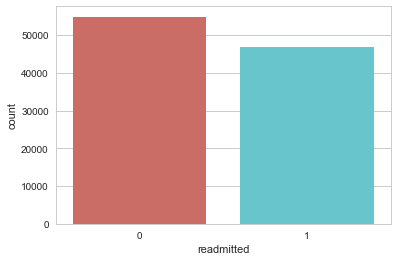

In [161]:
sns.countplot(x='readmitted',data=diab_maindf,palette = 'hls')
plt.show()


In [162]:
count_no_sub = len(diab_maindf[diab_maindf['readmitted']==0])
count_sub = len(diab_maindf[diab_maindf['readmitted']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no readmission is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of readmission", pct_of_sub*100)

percentage of no readmission is 53.911915571015854
percentage of readmission 46.08808442898414


In [163]:
#We can see that for patients for whom readmission have occurred,more were emergencies.  
diab_maindf.groupby('readmitted').mean()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
readmitted,,,,,,,,,,,,,
0,1.688332e+08,5.167949e+07,2.030585,3.788149,5.604185,4.254429,42.381598,1.410305,15.670367,0.273112,0.109216,0.381963,7.221366
1,1.609536e+08,5.743132e+07,2.016311,3.630826,5.930195,4.561575,43.930898,1.257175,16.432988,0.481941,0.301501,0.932220,7.658010


Text(0,0.5,'Readmissions')

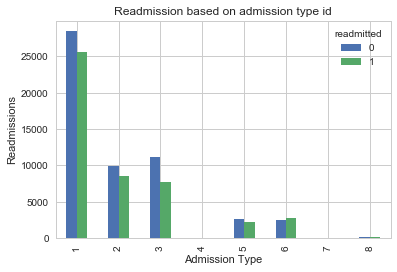

In [164]:
%matplotlib inline
pd.crosstab(diab_maindf.admission_type_id,diab_maindf.readmitted).plot(kind='bar')
plt.title('Readmission based on admission type id')
plt.xlabel('Admission Type')
plt.ylabel('Readmissions')
#We can see that re-admissions are highest when admission type is Emergency, followed by Urgent.

Text(0,0.5,'Readmissions')

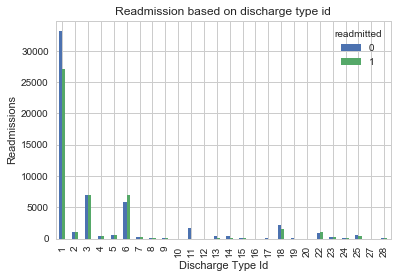

In [165]:
%matplotlib inline
pd.crosstab(diab_maindf.discharge_disposition_id,diab_maindf.readmitted).plot(kind='bar')
plt.title('Readmission based on discharge type id')
plt.xlabel('Discharge Type Id')
plt.ylabel('Readmissions')
#We can see that re-admissions are highest when discharge type is Discharged/transferred to home with home health service.

In [166]:
df = pd.get_dummies(diab_maindf, columns=['A1Cresult','max_glu_serum','insulin', 'change','diabetesMed','race','admission_type_id','discharge_disposition_id','admission_source_id'], drop_first=True)

df['gender'] = df['gender'].map({'Male':1,'Female':0})
df


,encounter_id,patient_nbr,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25
0,2278392,8222157,0.0,[0-10),?,1,?,Pediatrics-Endocrinology,41,0,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,0.0,[10-20),?,3,?,?,59,0,...,0,0,0,0,0,0,0,0,0,0
2,64410,86047875,0.0,[20-30),?,2,?,?,11,5,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,1.0,[30-40),?,2,?,?,44,1,...,0,0,0,0,0,0,0,0,0,0
4,16680,42519267,1.0,[40-50),?,1,?,?,51,0,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,1.0,[50-60),?,3,?,?,31,6,...,0,0,0,0,0,0,0,0,0,0
6,55842,84259809,1.0,[60-70),?,4,?,?,70,1,...,0,0,0,0,0,0,0,0,0,0
7,63768,114882984,1.0,[70-80),?,5,?,?,73,0,...,0,0,0,0,0,0,0,0,0,0
8,12522,48330783,0.0,[80-90),?,13,?,?,68,2,...,0,0,0,0,0,0,0,0,0,0
9,15738,63555939,0.0,[90-100),?,12,?,InternalMedicine,33,3,...,0,0,0,0,0,0,0,0,0,0


In [167]:
del df['patient_nbr']
del df['medical_specialty']
del df['payer_code']
del df['encounter_id']

In [168]:
del df['metformin']
del df['repaglinide']
del df['nateglinide']
del df['chlorpropamide']
del df['glimepiride']
del df['glipizide']
del df['glyburide']
del df['tolbutamide']
del df['rosiglitazone']
del df['acarbose']
del df['miglitol']
del df['troglitazone']
del df['examide']
del df['glyburide-metformin']
del df['glipizide-metformin']
del df['glimepiride-pioglitazone']
del df['metformin-rosiglitazone']
del df['metformin-pioglitazone']
del df['acetohexamide']
del df['pioglitazone']
del df['citoglipton']


In [169]:
del df['tolazamide']

In [170]:
del df['weight']

In [171]:
df.loc[1, :]

gender                               0
age                            [10-20)
time_in_hospital                     3
num_lab_procedures                  59
num_procedures                       0
num_medications                     18
number_outpatient                    0
number_emergency                     0
number_inpatient                     0
diag_1                             276
diag_2                          250.01
diag_3                             255
number_diagnoses                     9
readmitted                           1
A1Cresult_>8                         0
A1Cresult_None                       1
A1Cresult_Norm                       0
max_glu_serum_>300                   0
max_glu_serum_None                   1
max_glu_serum_Norm                   0
insulin_No                           0
insulin_Steady                       0
insulin_Up                           1
change_No                            0
diabetesMed_Yes                      1
race_AfricanAmerican     

In [172]:
del df['diag_1']
del df['diag_2']
del df['diag_3']

In [173]:
del df['age']

In [174]:
df =df.dropna()

In [175]:
X = df.loc[:, df.columns != 'readmitted']
y = df.loc[:, df.columns == 'readmitted']



In [176]:
df.describe()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,0.462398,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649,0.460894,...,0.000157,0.001228,0.000079,0.000020,0.000010,0.000020,0.066635,0.001582,0.000118,0.000020
std,0.498587,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578,0.498471,...,0.012538,0.035026,0.008866,0.004433,0.003135,0.004433,0.249390,0.039744,0.010859,0.004433
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['readmitted'])

In [178]:
data_final_vars=df.values.tolist()
y=['readmitted']

X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.ranking_)

[43 51 54 48 53 39 15  1 35 49 25 31  8 34 26 38 30 40 42  6  3 29  2 52
 44 28 37 36 18  5  1  1 45 50 41 10 11 13 32  1 46  1 22  1  1  1 21 20
 47  1  1  7 19 27 12  1  4 24 33  1 23  1  9 14  1  1  1  1  1 17  1 16
  1]


In [179]:
print(rfe.support_)

[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False  True False  True False  True  True  True False False
 False  True  True False False False False  True False False False  True
 False  True False False  True  True  True  True  True False  True False
  True]


In [180]:
cols=['admission_type_id_6', 'discharge_disposition_id_4', 'discharge_disposition_id_8', 'discharge_disposition_id_10', 'discharge_disposition_id_11', 'discharge_disposition_id_12', 'discharge_disposition_id_13', 
      'discharge_disposition_id_14', 'discharge_disposition_id_15', 'discharge_disposition_id_16', 'discharge_disposition_id_18', 'discharge_disposition_id_20', 'discharge_disposition_id_25', 'discharge_disposition_id_27', 'admission_source_id_3', 
      'admission_source_id_5', 'admission_source_id_8', 'admission_source_id_9', "admission_source_id_10", "admission_source_id_13"] 
X=os_data_X[cols]
y=os_data_y['readmitted']

In [181]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.679225
         Iterations: 35
                                    Results: Logit
Model:                      Logit                  No. Iterations:         35.0000    
Dependent Variable:         readmitted             Pseudo R-squared:       0.020      
Date:                       2018-09-22 15:21       AIC:                    104347.2397
No. Observations:           76784                  BIC:                    104532.2147
Df Model:                   19                     Log-Likelihood:         -52154.    
Df Residuals:               76764                  LL-Null:                -53223.    
Converged:                  0.0000                 Scale:                  1.0000     
--------------------------------------------------------------------------------------
                             Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------------------
admission_typ

C:\Users\H219960\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [183]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


In [184]:
#The result says we have 1084+10983 =12067  correct predictions and 501+10468= 10969 incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 1084 10468]
 [  501 10983]]


In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.09      0.17     11552
          1       0.51      0.96      0.67     11484

avg / total       0.60      0.52      0.42     23036



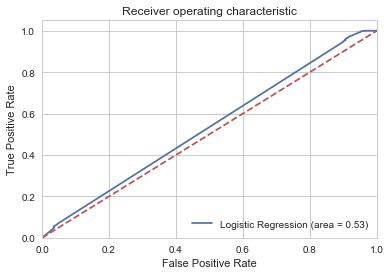

In [186]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()